In [1]:
from pycqed import *
import numpy as np
import sympy as sy

Changing the spanning tree of the circuit is like changing the gauge for the mode coordinates.

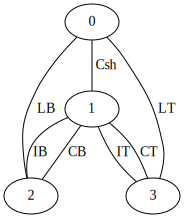

In [2]:
G = CircuitGraph()
G.addBranch(0, 1, "Csh")
G.addBranch(1, 2, "IB")
G.addBranch(1, 2, "CB")
G.addBranch(1, 3, "IT")
G.addBranch(1, 3, "CT")
G.addBranch(0, 2, "LB")
G.addBranch(0, 3, "LT")
G.addChargeBias(1, "Cg1")
G.drawGraphViz()

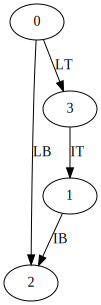

In [3]:
G.drawGraphViz(graph="SCGraph")

In [4]:
sym = SymbolicSystem(G, mode_transform=True)

Optimal basis representations for the circuit coordinates:
{1: 'charge', 2: 'oscillator', 3: 'oscillator'}


In [5]:
sym.getQuantumHamiltonian()

Matrix([[-0.5*I_{B}*(D^{\dagger}_{1}*D_{2} + D_{1}*D^{\dagger}_{2}) - 0.5*I_{T}*(exp(1.0*I*\phi_{31-0e})*D_{3}*D^{\dagger}_{1} + exp(-1.0*I*\phi_{31-0e})*D^{\dagger}_{3}*D_{1}) + (0.5*C_{00i}*(Q_{1e} + Q_{1}) + 0.5*C_{01i}*Q_{2} + 0.5*C_{02i}*Q_{3})*(Q_{1e} + Q_{1}) + (0.5*C_{01i}*(Q_{1e} + Q_{1}) + 0.5*C_{11i}*Q_{2} + 0.5*C_{12i}*Q_{3})*Q_{2} + (0.5*C_{02i}*(Q_{1e} + Q_{1}) + 0.5*C_{12i}*Q_{2} + 0.5*C_{22i}*Q_{3})*Q_{3} + 0.5*\Phi_{3}**2/L_{T} + 0.5*\Phi_{2}**2/L_{B}]])

In [6]:
Ca = 60 # fF/um^2
Jc = 1.0  # uA/um^2
jjf = 0.2 # um
h = NumericalSystem(sym)
h.configureOperator(1, 7, "charge")
h.configureOperator(2, 8, "oscillator")
h.configureOperator(3, 8, "oscillator")
h.setParameterValues(
    'CT', Ca*0.025*jjf,
    'CB', Ca*0.025*jjf,
    'IT', Jc*0.025*jjf,
    'IB', Jc*0.025*jjf,
    'LT', 2.0,
    'LB', 2.0,
    'Csh', 0.1,
    'Cg1', 0.0,
    'phi31-0e', 0.0,
    'Q1e', 0.5
)
print("Hilbert space size:", h.getHilbertSpaceSize())

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.
Hilbert space size: 960


In [7]:
E1 = h.getHamiltonian().eigenenergies()

In [8]:
dE1 = E1[1] - E1[0]
dE1

4.914493023035902

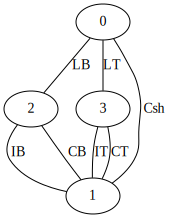

In [9]:
G = CircuitGraph()
G.addBranch(0, 2, "LB")
G.addBranch(0, 3, "LT")
G.addBranch(2, 1, "IB")
G.addBranch(2, 1, "CB")
G.addBranch(3, 1, "IT")
G.addBranch(3, 1, "CT")
G.addBranch(0, 1, "Csh")
G.addChargeBias(1, "Cg1")
G.drawGraphViz()

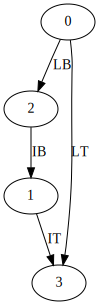

In [10]:
G.drawGraphViz(graph="SCGraph")

In [11]:
sym = SymbolicSystem(G)

Optimal basis representations for the circuit coordinates:
{2: 'oscillator', 3: 'oscillator', 1: 'charge'}


In [12]:
sym.getQuantumHamiltonian()

Matrix([[-0.5*I_{B}*(D^{\dagger}_{2}*D_{1} + D_{2}*D^{\dagger}_{1}) - 0.5*I_{T}*(exp(1.0*I*\phi_{13-0e})*D_{1}*D^{\dagger}_{3} + exp(-1.0*I*\phi_{13-0e})*D^{\dagger}_{1}*D_{3}) + (0.5*C_{00i}*Q_{2} + 0.5*C_{01i}*Q_{3} + 0.5*C_{02i}*(Q_{1e} + Q_{1}))*Q_{2} + (0.5*C_{01i}*Q_{2} + 0.5*C_{11i}*Q_{3} + 0.5*C_{12i}*(Q_{1e} + Q_{1}))*Q_{3} + (0.5*C_{02i}*Q_{2} + 0.5*C_{12i}*Q_{3} + 0.5*C_{22i}*(Q_{1e} + Q_{1}))*(Q_{1e} + Q_{1}) + 0.5*\Phi_{3}**2/L_{T} + 0.5*\Phi_{2}**2/L_{B}]])

In [13]:
Ca = 60 # fF/um^2
Jc = 1.0  # uA/um^2
jjf = 0.2 # um
h = NumericalSystem(sym)
h.configureOperator(1, 7, "charge")
h.configureOperator(2, 8, "oscillator")
h.configureOperator(3, 8, "oscillator")
h.setParameterValues(
    'CT', Ca*0.025*jjf,
    'CB', Ca*0.025*jjf,
    'IT', Jc*0.025*jjf,
    'IB', Jc*0.025*jjf,
    'LT', 2.0,
    'LB', 2.0,
    'Csh', 0.1,
    'Cg1', 0.0,
    'phi13-0e', 0.0,
    'Q1e', 0.5
)
print("Hilbert space size:", h.getHilbertSpaceSize())

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.
Hilbert space size: 960


In [14]:
E2 = h.getHamiltonian().eigenenergies()

In [15]:
dE2 = E2[1] - E2[0]
dE2

4.914493022935858

In [16]:
abs(dE1-dE2)

1.000444171950221e-10

In [17]:
sym = SymbolicSystem(G, mode_transform=False)
T = np.matrix([
    [1, -1, 0],
    [0.5, 0.5, 0],
    [-1, 0, 1]
])
sym.setTransform(T)

Optimal basis representations for the circuit coordinates:
{2: 'oscillator', 3: 'oscillator', 1: 'charge'}
Optimal basis representations for the circuit coordinates:
{2: 'oscillator', 3: 'oscillator', 1: 'charge'}


In [18]:
sym.getQuantumHamiltonian()

Matrix([[-0.5*I_{B}*(D^{\dagger}_{1} + D_{1}) - 0.5*I_{T}*(exp(1.0*I*\phi_{13-0e})*D_{1}*D_{2} + exp(-1.0*I*\phi_{13-0e})*D^{\dagger}_{1}*D^{\dagger}_{2}) + (0.5*(-0.5/L_{T} + 0.5/L_{B})*\Phi_{2} + 0.5*(1.0/L_{T} + 1.0/L_{B})*\Phi_{3})*\Phi_{3} + (0.5*(-0.5/L_{T} + 0.5/L_{B})*\Phi_{3} + 0.5*(0.25/L_{T} + 0.25/L_{B})*\Phi_{2})*\Phi_{2} + (0.5*C_{00i}*Q_{2} + 0.5*C_{01i}*Q_{3} + 0.5*C_{02i}*(Q_{1e} + Q_{1}))*Q_{2} + (0.5*C_{01i}*Q_{2} + 0.5*C_{11i}*Q_{3} + 0.5*C_{12i}*(Q_{1e} + Q_{1}))*Q_{3} + (0.5*C_{02i}*Q_{2} + 0.5*C_{12i}*Q_{3} + 0.5*C_{22i}*(Q_{1e} + Q_{1}))*(Q_{1e} + Q_{1})]])

In [19]:
Ca = 60 # fF/um^2
Jc = 1.0  # uA/um^2
jjf = 0.2 # um
h = NumericalSystem(sym)
h.configureOperator(1, 10, "charge")
h.configureOperator(2, 4, "oscillator")
h.configureOperator(3, 4, "oscillator")
h.setParameterValues(
    'CT', Ca*0.025*jjf,
    'CB', Ca*0.025*jjf,
    'IT', Jc*0.025*jjf,
    'IB', Jc*0.025*jjf,
    'LT', 2.0,
    'LB', 2.0,
    'Csh', 0.1,
    'Cg1', 0.0,
    'phi13-0e', 0.0,
    'Q1e', 0.5
)
print("Hilbert space size:", h.getHilbertSpaceSize())

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.
Hilbert space size: 336


In [20]:
E3 = h.getHamiltonian().eigenenergies()

In [21]:
dE3 = E3[1] - E3[0]
dE3

4.914482320369643

In [22]:
abs(dE2 - dE3)

1.0702566214604303e-05